In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import zipfile
import pathlib
import matplotlib.pyplot as plt
import csv
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# Import the librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import style
# Libaririe pour verifier les valeurs manquantes dans la base des donnees
import missingno as msno
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
from sklearn.ensemble import RandomForestClassifier
# Libaririe pour afficher l'arbre de decision suite au classifier de Random forest(Forest aleatoires) 
from sklearn.tree import export_graphviz
import pydot
# Librairies necessaires pour l'apprentissage
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, explained_variance_score)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from matplotlib.colors import ListedColormap
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.externals import joblib
import tensorflow as tf
import cv2
from PIL import Image
import skimage.transform

In [0]:
#Copie du jeu de données dans colaboratory
cp /content/drive/My\ Drive/Database.zip /

In [0]:
dataset = '/Database.zip'

In [0]:
import zipfile
with zipfile.ZipFile(dataset,'r') as zip_ref:
  zip_ref.extractall('/')

In [0]:
ll /Database/BaseDApprentissage/Training_Images-avecVeriteTerrain\(GT\)

In [0]:
train_path ="/Database/BaseDApprentissage/Training_HOG/HOG/HOG_02"
test_path = "/Database/BaseDeTest/Test_HOG/HOG_02"
labels_images = "/Database/BaseDeTest/Test_VeriteTerrain(GT).csv"

In [0]:
# function for reading the images
#train_path ="/Database/BaseDApprentissage/Training_HOG/HOG/HOG_02"
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads HOG traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example /Database/BaseDApprentissage/Training_HOG/HOG/HOG_02'
    Returns:   list of images, list of corresponding labels'''
    images = [] # Enregistrer les descripteurs HOG de chaque image
    labels = [] # corresponding labels
    i = 0
    # loop over all 43 classes
    for c in range(43):####
        currentDir = rootpath + '/' + format(c, '05d')   # subdirectory for class
        #print("Loading files for sign ",c, currentDir)
        for file in os.listdir(currentDir):
            # Prendre le nom du dossier de l'image + image 
            # Pour chaque image lue on aura nom de la classe de l'image correspondant et ses descripteurs pour avoir une coherence
            f = open(currentDir+'/'+file,"r")
            contents = f.read().strip()
            f.close()
            # Creer une liste qui contiendra les descpriteurs de chaque image HOG
            hog = [float(x) for x in contents.split("\n")]
            # Append l'ensemble des descripteurs de toutes les images dans la liste Images 
            # Qui sera un ensemble de liste des listes de chaque image avec son descripteur
            images.append(hog)
            # Append les labels de chaque image dans la liste Labels
            labels.append(c)
            i = i+1
                         
    return np.array(images), np.array(labels) #remove first row

In [0]:
images, labels = readTrafficSigns(train_path)

In [0]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [0]:
def readTestSigns(rootpath, resultsFile):
    images = []
    labels = [] # Stocker tous les classid des differents  images a partir du 
    # "Database/Database/BaseDeTest/Test_VeriteTerrain(GT).csv"
    currentDir = rootpath
    for file in os.listdir(currentDir):
        # Prendre le nom du image sans l'extension txt puis ajouter l'extension ppm
        lb = file.split('.')[0]+'.ppm'
        # Lire le fichier csv du GT test et stocker les comme une liste
        with open(resultsFile, "rt") as f:
            reader = csv.reader(f)
            # Convertir 
            df = list(reader)
            # Parcourir la liste et selectionner le premier element de la liste qui correspond
            # au nom de l'image 
        for name in df:
            for name_id in name:
                classe_id = name_id.split(';')[0]
                # verifer si le nom du fichier qui sera lue correspond au nom de l'image dans le dossier GT
                if lb == classe_id:
                     # Prendre la septieme ligne qui correspond au label de l'image
                     # Stocker-le dans la liste Labels=[] qui contiendra tous les labels des images
                    labels.append(name_id.split(';')[7])
                    # Lire le fichier dans le repertoire courant 
                    f = open(currentDir+'/'+file,"r")
                    contents = f.read().strip()
                    f.close()
                    #Parcourir chaque fichier lue separee dans par \n <<Signifie nouvelle ligne>>
                    # Stocker dans la liste hog qui contient les descripteurs HOG des images 
                    # Appendre ces differentes hog dans la liste images vide creee pour chaque HOG dans le dossier 
                    # test HOG
                    hog = [float(x) for x in contents.split("\n")]
                    #print(file.split('.')[0]+'.ppm')
                    images.append(hog)
    # Convertir le type de Labels en integer car le type de labels est string pour etre utilsee par notre modele 
    # Car le modele Forest aleatoires et support vecteur machine exigent a ce que les donnees soient de meme format
    # retourne les images et labels sous forme d'une liste de numpy array qui est exigee par le modele car
    # ca permet d'avoir une donnee avec une dimensionnalite longueur et largeur
    return np.array(images), np.array(labels).astype(int) 

In [0]:
testData, testLabels= readTestSigns(test_path, labels_images )

In [0]:
testData

Stocker les donnees d'entrainement et test pour gagner du temps et eviter d'executer a chaque la fonction

In [0]:
# Donnees d'entrainement sous numpy
np.save("/content/drive/My Drive/TP3 INDEXATION/TrainData.npy",images)
np.save("/content/drive/My Drive/TP3 INDEXATION/TrainLabels.npy",labels)
# Donnees de test sous numpy
np.save("/content/drive/My Drive/TP3 INDEXATION/TestData.npy",testData)
np.save("/content/drive/My Drive/TP3 INDEXATION/TestLabels.npy",testLabels)

# Model Random Forest


In [0]:
# Definir le classifier pour les forest aleatoires et laissez les parametres 
# La profondeur de l'arbre est 100 c'est le parametre le plus important 
# car plus le nombre de l'arbre augmente l'impureté  au niveau des feuilles diminuent
# Le criterion choisit est Gini qui permet de calculer l'Impureté de Gini
classifier = RandomForestClassifier()

In [0]:
# On applique maintenant notre classifier a ajuster les donnees d'entrainement sur les features et les labels correspondants
classifier.fit(images,labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Faire la prediction du modele a partir des donnees de test 
# On prends les features de Test data des images et on applique la fonction << predict>> de notre classifier
# Cette fonction retourne une liste des predictions des labels de donnees de test a partir de ce qu'il a appris sur les donnees d'entrainement avec la meme taille
# avec la focntion << fit >> appliquee sur les donnees de train
rf_predict = classifier.predict(testData)

In [0]:
rf_predict

array([ 4, 26, 38, ..., 12,  4,  4])

In [0]:
# Afficher le score de precision du modele sur les donnees de test 
# Pour cela on selectionne les labels des donnees de test et on applique la accuracy_score a partir du librairie 
# from sklearn.metrics et la precision du modele est 96%
print('Accuracy: ', accuracy_score(testLabels, rf_predict))

Accuracy:  0.9614410134600159


In [0]:
# On calcule la matrix de confusion de nos 42 classes pour quelles sont celles qui ont bien ete predictes et appris par le modele
# Pour voire les corrections predictions et les mauvaises predictions faites par le modele
# Vrais positifs, Vrais negatifs, Faux positifs, faux Negatifs
confusion = confusion_matrix(testLabels, rf_predict)

In [0]:
# Utilisons set pour ne selectioner que les labels dans notre liste contenant tous les labels mais sans duplication du numero de meme label
classes_labels =set(testLabels)

In [0]:
# On utilise le librairie Seaborn pour la visualition de cette matrix de confusion c'est un  outil de visualition comme matplotlib
def print_confusion_matrix(confusion_matrix, class_names, figsize = (16,13), fontsize=20):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    # Retourner une erreur si les valeurs sont de type float or string
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Vrais labels des images')
    plt.xlabel('Les labels predits par le modele')
    return fig

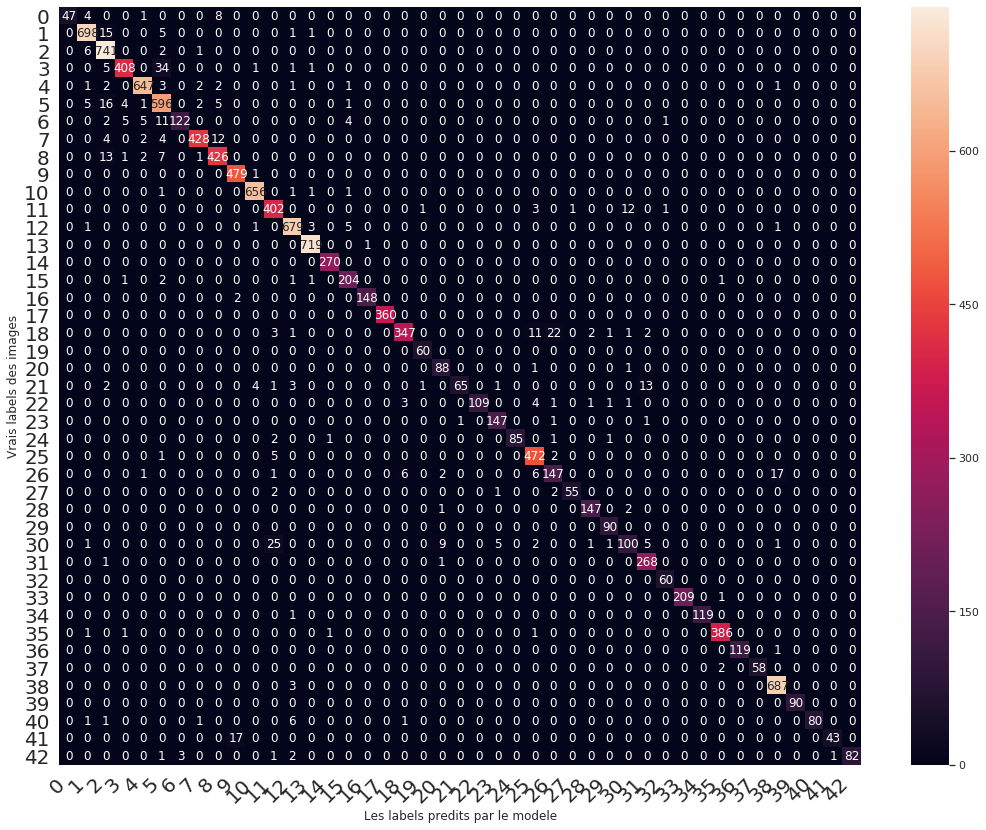

In [0]:
figure  = print_confusion_matrix(confusion, classes_labels)

In [0]:
# Afficher le rapport de la classification de prediction pour avoir une idee sur la precision du modele mais aussi les autres mesures de precision
# Cela est important ,il permettra de nous donner une idee sur notre donnees mais sur la distribution car une base de donnees qui n'est pas balancee de facon
# equitable donnera une tres bonne precision mais une mauvaise performance au niveau des autres mesures tels que le F1-score et le recall
print ("Classification Report: ")
print (classification_report(testLabels, rf_predict))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        60
           1       0.97      0.97      0.97       720
           2       0.92      0.99      0.95       750
           3       0.97      0.91      0.94       450
           4       0.98      0.98      0.98       660
           5       0.89      0.95      0.92       630
           6       0.98      0.81      0.89       150
           7       0.98      0.95      0.97       450
           8       0.94      0.95      0.94       450
           9       0.96      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.91      0.96      0.93       420
          12       0.97      0.98      0.98       690
          13       0.99      1.00      0.99       720
          14       0.99      1.00      1.00       270
          15       0.94      0.97      0.96       210
          16       0.99      0.99      0.99       150
   

#Amerlioration Forest aleatoires avec les meilleurs parametres 

In [0]:
# Au vue du premier modele on va essayer d'ameliorer notre avec l'optimisation des parametres
# Augmenter le nombre de l'arbre dans les forest pour avoir moins d'impurite au niveau du modele avec le parametre <<n_estimators>> 
# qui prendra les differentes valeurs suivantes [200, 500,700,1000] pour voir quelle valeur est optimale pour avoir un bon classifieur 
# <<max_features>> : Permet de selectionner quelle features importantes a utiliser pour le modele
# <<max_depth>> :[10,15,10,25,30] ce parametre va nous permettre de choisir quelle valeur est bonne pour la profondeur de l'arbre
# <<criterion>>:['gini', 'entropy'] cette fonction est importante car elle nous dit lequel de ces deux parametres est bon pour la division de chaque arbre de decision 
rf = RandomForestClassifier(random_state = 42)
param_grid = { 
    'n_estimators': [200, 500,700,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,10,25,30],
    'criterion' :['gini', 'entropy']
}

In [0]:
#Le Librairie GriGridSearchCV <<from sklearn.model_selection>> nous permet de passer notre parametre et ajuster le modele avec les donnees
# d'entrainement pour savoir lesquels des parametres sont importants
# CV utilisera 3 cross-validation sur notre donnees d'entrainement pour entrainer le modele sur 70% des donnees et le valider sur 30%
# Ce qui permettra d'eviter le probleme de sur-apprentissage
grid_rf = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv=3)
grid_rf.fit(images, labels)

In [0]:
print(grid_rf.best_params_)

In [0]:
# Applique maintenant notre classifier a ajuster les donnees d'entrainement sur les features et les labels correspondants avec les meilleurs parametres
rf_optimale = RandomForestClassifier(n_estimators = 800,max_depth = 60,criterion = 'gini',max_features = 'auto').fit(images, labels)

# Modele Support Vector Machine SVM

In [0]:
# On definit notre classifier de support vecteur machine
# On laisse les parametres par default pour verfier comment le modele va apprendre
# Le noyau par du classifier pour le SVM est <<rdf>> qui est un noyau gaussien
# le parametre C est 1.0 qui est un parametre de regularisation permettant d'accepter oui ou non une decision de bordure petite ou grande par rapport 
# a la misclassification de toutes les observations des donnees d'entrainement sur la fonction d'objective 
classifier = SVC()

In [0]:
from sklearn.preprocessing import StandardScaler
# Scaling the Train and Test feature set.
# C'est important de normaliser les donnees pour etre dans la meme range car cela permettra au modele de ne pas considerer une observation importante par rapport 
# a une autre parce-que si les donnees ne sont pas distribuees de facon normale (distribution normale ou gaussienne) il faut donc la presence des donnees aberantes
# ce qui va pousser notre modele d'ignorer ses observations donc eviter ca nous normalisons nos donnees.
# Le temps de computation sera aussi rapide pour notre classifier SVM.

scaler = StandardScaler()

images_scaled = scaler.fit_transform(images)
testData_scaled = scaler.transform(testData)

In [0]:
# On applique maintenant notre classifier a ajuster les donnees d'entrainement sur les features et les labels correspondant
classifier.fit(images_scaled, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Faire la prediction du modele a partir des donnees de test 
# On prends les features de Test data des images et on applique la fonction << predict>> de notre classifier
# Cette fonction retourne une liste des predictions des labels de donnees de test a partir de ce qu'il a appris sur les donnees d'entrainement avec la meme taille
# avec la focntion << fit >> appliquee sur les donnees de train
prediction_SVM = classifier.predict(testData_scaled)

In [0]:
# Afficher le score de precision du modele sur les donnees de test 
# Pour cela on selectionne les labels des donnees de test et on applique la accuracy_score a partir du librairie 
# from sklearn.metrics et la precision du modele est 95% cela s'explique que le meilleur noyau pour notre jeu de donnees est le gaussian 
# d'ou une distribution normale de notre donnees
print('Accuracy: ', accuracy_score(testLabels, prediction_SVM))

Accuracy:  0.9511480601741884


In [0]:
# On calcule la matrix de confusion de nos 42 classes pour quelles sont celles qui ont bien ete predictes et appris par le modele
# Pour voire les corrections predictions et les mauvaises predictions faites par le modele
# Vrais positifs, Vrais negatifs, Faux positifs, faux Negatifs
confusion = confusion_matrix(testLabels, prediction_SVM)

In [0]:
print(confusion)

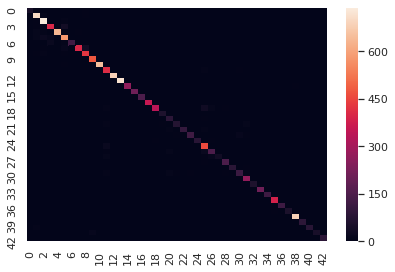

In [0]:
# On utilise le librairie Seaborn pour la visualition de cette matrix de confusion c'est un  outil de visualition comme matplotlib
sns.heatmap(confusion_matrix(testLabels, prediction_SVM))

In [0]:
# Afficher le rapport de la classification de prediction pour avoir une idee sur la precision du modele mais aussi les autres mesures de precision
# Cela est important ,il permettra de nous donner une idee sur notre donnees mais sur la distribution car une base de donnees qui n'est pas balancee de facon
# equitable donnera une tres bonne precision mais une mauvaise performance au niveau des autres mesures tels que le F1-score et le recall
print ("Classification Report: ")
print (classification_report(testLabels, prediction_SVM))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.77      0.86        60
           1       0.93      0.98      0.95       720
           2       0.92      0.98      0.95       750
           3       0.91      0.88      0.90       450
           4       0.99      0.96      0.97       660
           5       0.89      0.92      0.90       630
           6       0.99      0.81      0.89       150
           7       0.97      0.88      0.93       450
           8       0.91      0.95      0.93       450
           9       0.97      1.00      0.98       480
          10       1.00      0.99      0.99       660
          11       0.87      0.97      0.92       420
          12       0.99      1.00      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      0.99      0.99       270
          15       1.00      1.00      1.00       210
          16       1.00      0.98      0.99       150
   

#Amerlioration du SVM avec les meilleurs parametres 

Etape 1: le pre-processing 


Normalisation des donnees d'entrainement pour permettre au SVM d'apprendre rapidement mais aussi eviter a ce que le modele considere une observation importante par rapport a une autre si ils ne sont pas dans le meme scale cette etape est tres importante pour certains algorithmes de machine learning d'autres le font d'eux meme mais pas d'autres pour notre cas le SVM ne fait pas donc on doit le faire pour avoir une bonne precision et un temps d'apprentissage rapide

In [0]:
# Scaling the Train and Test feature set.
# C'est important de normaliser les donnees pour etre dans la meme range car cela permettra au modele de ne pas considerer une observation importante par rapport 
# a une autre parce-que si les donnees ne sont pas distribuees de facon normale (distribution normale ou gaussienne) il faut donc la presence des donnees aberantes
# ce qui va pousser notre modele d'ignorer ses observations donc eviter ca nous normalisons nos donnees.
# Le temps de computation sera aussi rapide pour notre classifier SVM.
from sklearn.preprocessing import StandardScaler

In [0]:
# definir une instance de la classe <<StandardScaler()>>
scaler = StandardScaler()

In [0]:
# Les nouvelles valeurs seront obtenues en utilisant la methode <<fit_transform>> de la classe <<scaler>>
X_train_scaled = scaler.fit_transform(images)
X_test_scaled = scaler.transform(testData)

In [0]:
# Definir le classifier
svc_best = SVC()

In [0]:
#Finding best parameters for our SVC model
param = {
    'C': [1, 10, 100, 1000],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.001, 0.0001]
}
grid_svc = GridSearchCV(svc_best, param_grid=param, scoring='accuracy', cv=10)
#Fitting the model
grid_svc.fit(X_train_scaled, labels)

In [0]:
grid_svc.best_params_

# Model CNN : Convolutional Neural Network (CNN) 

#Etape 1 : Pretraitement des donnees pour notre modele :

# A) Chargement de nos images:

Fonction permettant de charger nos differentes donnees training et test avec les labels correspondant

In [0]:
path_images_train = "/Database/BaseDApprentissage/Training_Images-avecVeriteTerrain(GT)"

In [0]:
# function for reading the images
# arguments: path to the traffic sign data
# returns: list of images, list of corresponding labels 
import matplotlib.pyplot as plt
import csv
def readTrafficSignsTrainImages(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        #print(prefix)
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file

        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
             # la 8th colonne correspond au nom du label et  on convertir le label du format string en integer pour l'utiliser
             # dans notre modele car un modele de Machine Learning ne travaille qu'avec les chiffres donc pas de texte
             #Enfin on ajoute le label de chaque image dans la liste Labels creee pour avoir une liste
             # de tous les labels
            labels.append(int(row[7]))
        # On ferme le file gtFile qu'on a ouvert car on 'a pas utilise le context manager de Python
        gtFile.close()
    return np.array(images), np.array(labels)

In [0]:
TrainImages, LabelsImages = readTrafficSignsTrainImages(path_images_train)

In [0]:
# Donnees d'entrainement sous numpy
np.save("/content/drive/My Drive/TP3 INDEXATION/TrainDataCNN.npy",TrainImages)
np.save("/content/drive/My Drive/TP3 INDEXATION/TrainLabelsCNN.npy",LabelsImages)
# Donnees de test sous numpy
#np.save("/content/drive/My Drive/TP3 INDEXATION/TestData.npy",testData)
#np.save("/content/drive/My Drive/TP3 INDEXATION/TestLabels.npy",TestLabels)

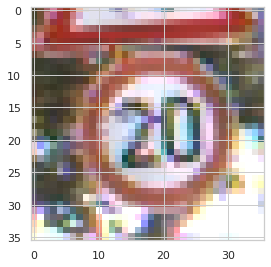

In [0]:
#print(len(TrainImages)), print(len(LabelsImages))
#LabelsImages
plt.imshow(TrainImages[42])
plt.show()

In [0]:
imgs_test ='/Database/BaseDeTest/Test_Images/Images/'
imgs_labels = '/Database/BaseDeTest/Test_VeriteTerrain(GT).csv'

In [0]:
# Fonction pour lire les images de test mais aussi prendre les labels correspondants
def readTrafficSignsTestImages(path_test_images, path_label_images):
  test_images = [] # stocker les images correspondantes dans la liste
  test_labels = [] # Correspondant labels des images de test
  # Parcourir l'ensemble de 42 labels de nos images
  prefix = path_test_images
  gtfile = open(path_label_images) # Ouvrir le fichier csv de GT du test afin de le lire
  reader = csv.reader(gtfile, delimiter=';') # lire le fichier separee par ";" 

  next(reader) # skip header
  # loop over all images in current annotations file
  for row in reader:
      test_images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
      test_labels.append(int(row[7])) # the 8th column is the label
  gtfile.close()
  return np.array(test_images) ,np.array(test_labels)

In [0]:
ImagesTest, ImagesLabelsTest = readTrafficSignsTestImages(imgs_test, imgs_labels)

In [0]:

# Donnees de test sous numpy
np.save("/content/drive/My Drive/TP3 INDEXATION/TestDataImages.npy",ImagesTest)
np.save("/content/drive/My Drive/TP3 INDEXATION/TestLabelsImages.npy",ImagesLabelsTest)

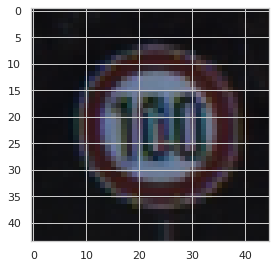

In [0]:
plt.imshow(ImagesTest[11])
plt.show()

# B ) Exploration de nos images :

In [0]:
# Nous avons cree cette fonction qui prend trois arguments en parametre les images , les labels et le nombre d'images a afficher
# les classes des differentes images mais la chose la plus importante est d'afficher les dimensions des differentes images
# pour savoir si nous aurons besion de normaliser les sizes de nos images et les pixels ranges des images
def print_random_images(images, labels, number_of_images_to_display, color_map='hsv'):
  # Etape 1: On doit verifer si le nombre d'images est present dans notre liste d'images 
  
   if number_of_images_to_display % 4 == 0:
       num_rows = number_of_images_to_display / 4
   else:
       num_rows = int(number_of_images_to_display / 4) + 1
  # Etape 2: Une fois cette etape 1 passee nous selectionnons de facon aleatoire les images afficher 
   random_indices = [np.random.randint(0, images.shape[0]) for n in range(number_of_images_to_display)]
   # print(random_indices)
   # Parcourir l'ensemble des images selectionnees  pour afficher ces images avec leurs dimensions respectives 
   for counter in range(number_of_images_to_display):
       index = random_indices[counter]
       plt.subplot(num_rows, 4, counter + 1)
       # plt.axis('off')
       plt.imshow(images[index], cmap=color_map)
       # Afficher la classe de l'image et le nombre de fois cette classe est dans la base des donnees
       plt.title('Class :{0}, Class Count: {1} '.format(labels[index], list(labels).count(labels[index]))) 
       plt.show()
       # Enfin afficher les dimensions des differentes images et le min pixel et le max pour avoir une idee si on doit normaliser nos images

       print('Image Dimensions: {0}, Min Pixel: {1}, Max Pixel: {2}'.format(images[index].shape, images[index].min(),images[index].max()))
       plt.subplots_adjust(wspace=1)   

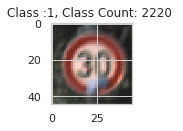

Image Dimensions: (45, 45, 3), Min Pixel: 23, Max Pixel: 255


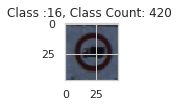

Image Dimensions: (47, 44, 3), Min Pixel: 9, Max Pixel: 126


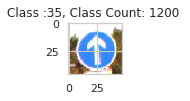

Image Dimensions: (46, 48, 3), Min Pixel: 10, Max Pixel: 255


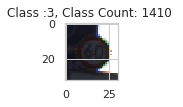

Image Dimensions: (33, 31, 3), Min Pixel: 5, Max Pixel: 255


<Figure size 432x288 with 0 Axes>

In [0]:
print_random_images(TrainImages, LabelsImages, 4)

#C ) Transformation de nos images:

Maintenant, comme les dimensions de l'image varient pour les images de l'ensemble de données, nous aurions besoin de normaliser l'ensemble de données à une seule dimension, comme prévu par le modèle et cela va nous permettra d'avoir une base des donnees normalisees qu'on va ensuite faire passer a notre modele

In [0]:
# Fonction pour normaliser les images d'entrainement ,Test et validation au meme size
# Elle prends en entree trois paramtres la liste des images a normaliser et les nouveaux sizes qu'on veut aux images
# Pour faire cela nous utiliserons le librairie <<skimage.transform.resize> pour effectuer ce travail
# Retourner les nouvelles images avec la taille et la largeur des images changees
def transform_images(images,height,width):
  transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
  return  np.array(transformed_images)

Diviser la base d'entrainement en deux parties une partie entrainement et validation :

In [0]:
from sklearn.model_selection import train_test_split
# Nous utilisons <<from sklearn.model_selection import train_test_split>>
# Cette etape est importante dans un modele de machine learning car cela nous permettra d'eviter le probleme de sur-apprentissage
# On utilisera les donnees de validation pour valider la precision du modele a chaque iteration
# Diviser les donnees d'apprentissange en deux parties 80% pour l'entraitement et 20% pour la validation a chaque etape 
train_images, val_images, train_labels, val_labels = train_test_split(TrainImages,LabelsImages,
                                                                                  stratify = LabelsImages,test_size = 0.2)
print('Train Image Split dims: ',train_images.size)
print('Train Labels Split dims: ',train_labels.size)
print('Val Image Split dims: ',val_images.size)
print('Val Labels Split dims: ',val_labels.size)

Train Image Split dims:  31367
Train Labels Split dims:  31367
Val Image Split dims:  7842
Val Labels Split dims:  7842


Application de notre fonction de transformation des images sur les trois bases d'images : Training data , Validation data et Test data:
Pour probleme de computation on a decidee de choisir les valeurs (64,64) a ce que nos images soient resizees a ces valeurs 

On a experimente plusieurs valeurs comme par example: 34*34 avec ces valeurs nos  images ne sont pas trop lisibles et ca sera difficile d'extraire les caracterisques importantes de l'image (feature map) comme on le sait resizing une image va forcement dimunier la qualite de l'image donc une perte qualite

Avec les valeurs(128*128) nous parvenons pas a avoir le resultat pour probleme de memoire et apres plusieurs minutes d'attente la cellule d'execution s'arrete

On'a finalement chosir les valeurs (64*64) pour les images et les resulats sont les suivantes:

In [0]:
train_split_images = transform_images(train_images,64,64)
print('Finished Trasforming Images for Train,Test and Validation Sets')

Finished Trasforming Images for Train,Test and Validation Sets


In [0]:
test_split_images = transform_images(ImagesTest,64,64)
print('Finished Trasforming Images for Train,Test and Validation Sets')

Finished Trasforming Images for Train,Test and Validation Sets


In [0]:

val_split_images = transform_images(val_images,64,64)

print('Finished Trasforming Images for Train,Test and Validation Sets')

Finished Trasforming Images for Train,Test and Validation Sets


# D ) Visualisations des nouvelles images:

Pour afficher les resultats de nos nouvelles images on a cree une fonction 
qui prends en entree deux arguments et affiche la premiere image de chaque classe avec le nombre des images dans la classe correspondante

In [0]:
def show_images_of_all_classes(train_images,training_labels):
  num_cols =  8
  classes = len(set(training_labels))
  if classes % num_cols == 0:
      num_rows =  classes / num_cols
  else:
      num_rows = int(classes / num_cols) + 1
  plt.figure(figsize=(15,15))
  i = 1
  for class_number in set(training_labels):
    
    indices = np.where(training_labels == class_number)
    plt.subplot(num_rows,num_cols, i)
    i += 1
    plt.axis('off')
    plt.imshow(train_images[indices[0][1]])
    plt.title('Class :{0} [{1}] '.format(class_number,len(indices[0])))   #np.count_nonzero(labels == labels[index])))
  plt.show()


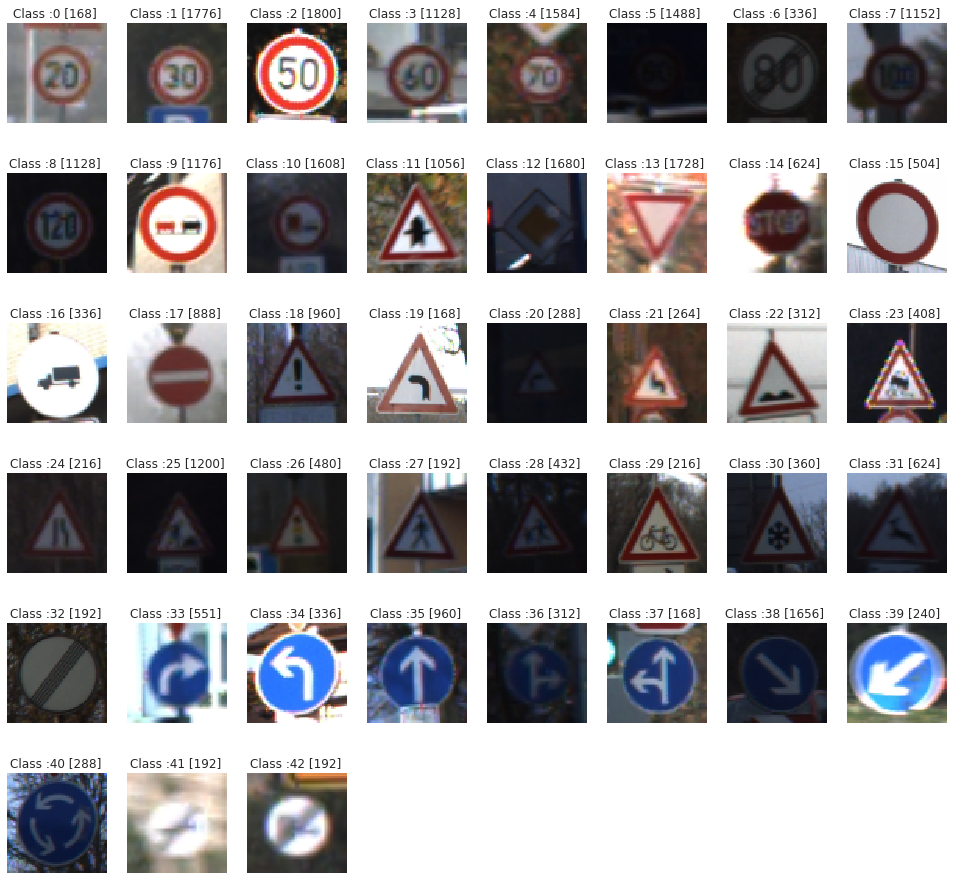

In [0]:
show_images_of_all_classes(train_split_images,train_labels)

# E ) Augmentation des images:

Comme les etudes recentes ont montré un modele de deep learning a besoin d'une grande capacité des données pour apprendre correctement la correlation entre les images dans le but de faire une bonne prediction  et avoir une grande capacité n'est pas une chose facile .
Donc pour augmenter nos données nous avons utilisé Keras  qui fournit une API pratique pour effectuer diverses opérations sur nos images d'entrée avant de les transmettre au modèle. Ces changements vont du recadrage de l'image au retournement et même à la fourniture d'effets de cisaillement etc......
Nous gardons «fill_mode='nearest'» afin qu'il remplisse les pixels vides avec leurs voisins disponibles les plus proches pour eviter d'avoir de parties vides dans nos images . Nous utilisons le code suivant pour prévisualiser les images générées.


In [0]:
# Training Data Generator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.25,fill_mode='nearest')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()


# Etape 2: Formation du modele:

In [0]:
# Preparer nos genertors pour le modele 
# Definir le nombre de batch_size = 32 c'est un parametre d'optimisation donc c'est modifiable et c'est important de jouer avec la valeur pour voir si le modele 
# apprends mieux car il indique la taille du sous-ensemble de notre échantillon de formation  qui va être utilisé par notre réseau pendant son processus d'apprentissage.
# a chaque iteration.

train_generator = training_datagen.flow(train_split_images, train_labels,batch_size=32)

validation_generator = validation_datagen.flow(val_split_images,val_labels,batch_size=32)

Labels: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


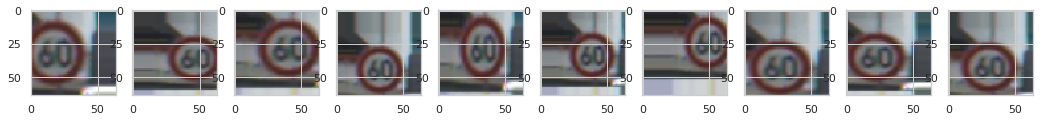

In [0]:
# Pour visualiser ses differentes transformations sur nos images a chaque iteration  , nous prendrons le cas ou le batch_size = 1
# sur une image d'entrainement des dix premiers transformations , le resultat est le suivant
modele_generator = training_datagen.flow(train_split_images[1:2], train_labels[1:2],batch_size=1)

sign = [next(modele_generator) for i in range(0,10)]
fig, ax = plt.subplots(1,10, figsize=(16, 6))
print('Labels:', [item[1][0] for item in sign])
l = [ax[i].imshow(sign[i][0][0]) for i in range(0,10)]

Define Convolutional Network

In [0]:
from keras import backend as K
K.tensorflow_backend.set_image_dim_ordering('th')

#Notre modele sera consititue de 5 couches de convolution avec le noyau de convolution (2*2) et le nombre de stride (le pat ) que le noyau de convolution utilisera pour extraire les features importantes  de nos images , deux couches fully connected sur lesquelles on applique le dropout avec une valeur 0.5 (parametre d'optimisation) pour empecher  le modele de recevoir les memes informations(correlations entre les images ) a chque iteration d'apprentissage permet d'eviter le probleme de sur-apprentissage de notre et afin une couche de sortie qui correspondra au nombre des labels de notre base d'apprentissage(42) classes.


Pour implementer ce modele nous avons defini une fonction qui prends 5 arguments en entree: Image d'entrainement , le nombre de classes avec (<<len(set(train_labels))>>) pour avoir uniquement le nombre des classes sans duplication d'une classe quelque(donc uniquement des valeurs uniques), la taille du noyau , la valeur de stride pour notre kernel de convolution et afin le nombre de convolutions de nos images au niveau de chaque couche.

La fonction d'activation utilisee pour la couche de sortie est le <<softmax>> qui calcule la probabilite de chaque image appartenant a une classe cette valeur de probabilite est comprise entre << 0 - 1 >>

La fonction de perte utilisee dans notre modele est << sparse_categorical_crossentropy>> qui est utilisee pour les multiples classes surtout si les labels sont des
integers(entiers) ce qui est notre cas car les labels de nos images sont comprises entre [0 a 42]

In [0]:
def conv_net(train_images_dims,num_of_classes,filter_size = 2,num_convolutions=64,num_strides=2):
  # definir le modele 
  model  = tf.keras.Sequential()
  
  #Conv1
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu',input_shape=(train_images_dims[1],train_images_dims[2],train_images_dims[3])))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides ))
    
  #Conv2
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv3
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
    
  #Conv4
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv5
  model.add(tf.keras.layers.Conv2D(int(num_convolutions) ,(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
  
  #Flatten and add Dense Layer
  model.add(tf.keras.layers.Flatten())
  #Dense 1
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  #Dense 2
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  
  #Output Layer
  model.add(tf.keras.layers.Dense(num_of_classes,activation = 'softmax'))
  return model


Define Callback

# A) Definition des parametres d'optimisation du modele:

La technique de EarlyStopping a ete utilise dans notre modele ce qui permettra au modele d'arreter l'apprentissage s'il trouve qu'il n'apprends rien de nouveau a une certaine etape de l'apprentissage c'est pas quelque chose qui est optimale mais ca permet d'eviter de faire tourner le modele pour tres longtemps.
les parametres utilisees sont les suivants: min_delta  = 0.01 et patience = 8
qui permettent au modele d'arreter l'apprentissage apres 8 epochs s'il n'ameliore pas une valeur min de 0.01 %

La fonction d'optimisation utilsee est Adam optimizer fourni par Keras tres souvent utilisee pour les problemes de classification des images

In [0]:
monitor = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 8,restore_best_weights = True, min_delta = 0.01)

In [0]:
model_regularized = conv_net(train_split_images.shape,len(set(train_labels)),filter_size=2,num_convolutions=512)

In [0]:
model_regularized.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model_regularized.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 63, 63, 512)       6656      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 512)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 512)       1049088   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 512)       1049088   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 512)        

In [0]:
history = model_regularized.fit_generator(train_generator, validation_data=validation_generator,
                                          steps_per_epoch=(len(train_split_images) / 32),epochs = 52,verbose=1,callbacks=[monitor])

Epoch 1/52
981/980 [==============================] - 95s 97ms/step - loss: 2.9098 - acc: 0.1753 - val_loss: 1.7731 - val_acc: 0.3892
Epoch 2/52
981/980 [==============================] - 90s 92ms/step - loss: 1.7131 - acc: 0.4250 - val_loss: 1.3571 - val_acc: 0.5409
Epoch 3/52
981/980 [==============================] - 92s 94ms/step - loss: 1.2635 - acc: 0.5628 - val_loss: 0.8809 - val_acc: 0.6822
Epoch 4/52
981/980 [==============================] - 92s 94ms/step - loss: 0.8867 - acc: 0.6936 - val_loss: 0.4767 - val_acc: 0.8261
Epoch 5/52
981/980 [==============================] - 92s 94ms/step - loss: 0.6110 - acc: 0.7894 - val_loss: 0.3365 - val_acc: 0.8836
Epoch 6/52
981/980 [==============================] - 92s 94ms/step - loss: 0.4587 - acc: 0.8489 - val_loss: 0.2673 - val_acc: 0.9053
Epoch 7/52
981/980 [==============================] - 92s 94ms/step - loss: 0.3529 - acc: 0.8846 - val_loss: 0.1972 - val_acc: 0.9315
Epoch 8/52
981/980 [==============================] - 92s 94ms

#B) Visualisation des resultats 


Visualisation des erreus au cours de chaque epoque:


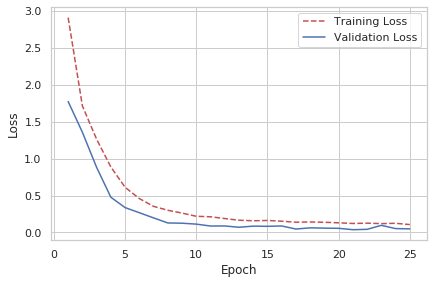

In [0]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();



Le resultat sur le graphe nous montre comment le modele apprends car les deux courbes convergent toutes sur zero (0) , le modele ajuste mieux les erreurs prises sur les donnees d'entrainement pour mieux ajuster au prochain iteration et avant d'arriver au 25 epoque il voulait sur apprendre car il ne trouvait rien aucune nouvelle information sur laquelle il peut encore se servir pour ameliorer la performance

Visualisons la courbe d'evalutaion des donnees d'entrainement et validation

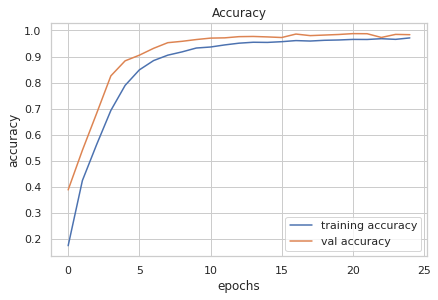

In [0]:
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
# Sur le graphe on voit que la validation du modele sur les donnees de validation s'approchent a une precision de 100%
# Cet resulat peut s'expliquer par la complexite du modele mais aussi grace a la relation quasi-parfaite entres les donnees (pouvoir d'explicabilite assez importantes)
# Des donnees d'entree par rapport aux donnees de sortie 
# Il y a la possibilite d'ameliorer le modele au vue de la visualtion de la courbe et pour ce cas il faut alors considerer les parametres d'optimisation du modele telsque :
# le nombre du bach_size , le nombre d'epochs et le dropout ce qui nous permettra d'eviter le sur-apprentissage


#C )Evaluation du modele sur les donnees de test

In [0]:
# Pour evaluer la precision de notre modele , il est important de lui presenter des nouvelles donnees qui n'a jamais pour voir 
# s'il est capable d'identifier les traits communs entre ces images et celles qu'il a deja appris
# Pour faire ce test nous avons utilise la fonction <<evalute>>
indexes = []
for label in set(ImagesLabelsTest):
        indexes.append(np.where(ImagesLabelsTest == label)[0])
   
#indexes = [ind[0][0] for ind in indexes]
print(len(indexes))
id  = []
# Iterate over the list 
for i in indexes:
    id.append(i.flat[0])
class_wise_test_img = test_split_images[id]
class_wise_test_labels = ImagesLabelsTest[id]
print(class_wise_test_img.shape)

43
(43, 64, 64, 3)


In [0]:
model_regularized.evaluate(test_split_images,ImagesLabelsTest)

12630/12630 [==============================] - 13s 1ms/sample - loss: 0.2494 - acc: 0.9381


[0.2493546751042443, 0.93808395]

In [0]:
# Class wise image test
model_regularized.evaluate(class_wise_test_img,class_wise_test_labels)

43/43 [==============================] - 0s 2ms/sample - loss: 0.1774 - acc: 0.9302


[0.17741214050803072, 0.9302326]

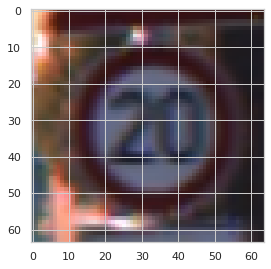

PREDICTION : The Image belongs to class : 8, with description : 25
ACTUAL : The Image belongs to class : 0, with description : 16


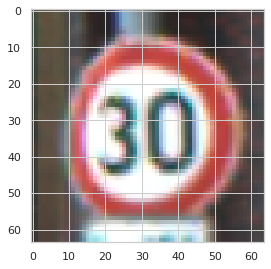

PREDICTION : The Image belongs to class : 1, with description : 1
ACTUAL : The Image belongs to class : 1, with description : 1


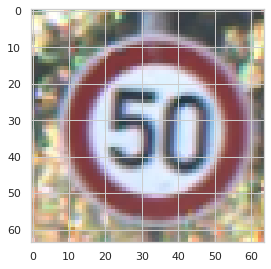

PREDICTION : The Image belongs to class : 2, with description : 38
ACTUAL : The Image belongs to class : 2, with description : 38


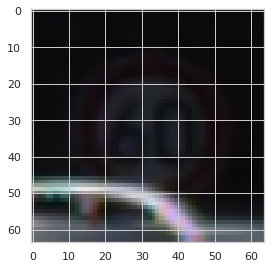

PREDICTION : The Image belongs to class : 3, with description : 33
ACTUAL : The Image belongs to class : 3, with description : 33


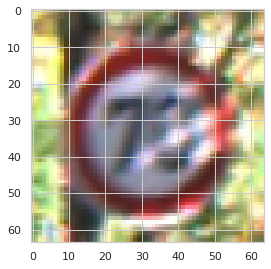

PREDICTION : The Image belongs to class : 4, with description : 11
ACTUAL : The Image belongs to class : 4, with description : 11


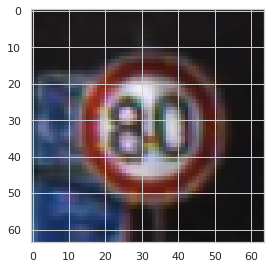

PREDICTION : The Image belongs to class : 5, with description : 38
ACTUAL : The Image belongs to class : 5, with description : 38


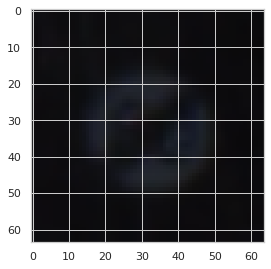

PREDICTION : The Image belongs to class : 6, with description : 18
ACTUAL : The Image belongs to class : 6, with description : 18


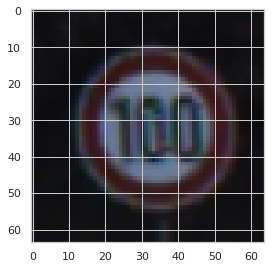

PREDICTION : The Image belongs to class : 7, with description : 12
ACTUAL : The Image belongs to class : 7, with description : 12


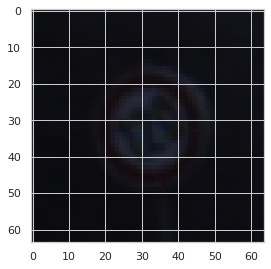

PREDICTION : The Image belongs to class : 7, with description : 12
ACTUAL : The Image belongs to class : 8, with description : 25


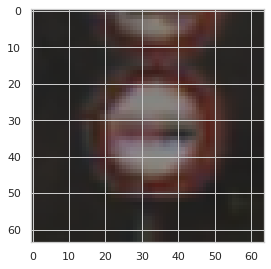

PREDICTION : The Image belongs to class : 9, with description : 35
ACTUAL : The Image belongs to class : 9, with description : 35


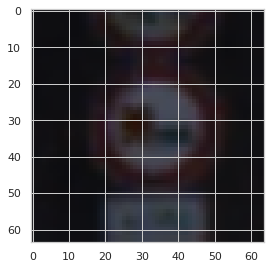

PREDICTION : The Image belongs to class : 10, with description : 12
ACTUAL : The Image belongs to class : 10, with description : 12


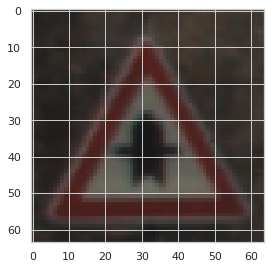

PREDICTION : The Image belongs to class : 11, with description : 7
ACTUAL : The Image belongs to class : 11, with description : 7


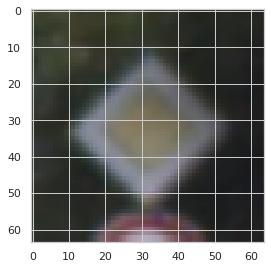

PREDICTION : The Image belongs to class : 12, with description : 23
ACTUAL : The Image belongs to class : 12, with description : 23


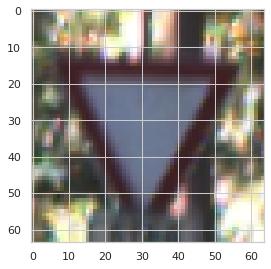

PREDICTION : The Image belongs to class : 13, with description : 7
ACTUAL : The Image belongs to class : 13, with description : 7


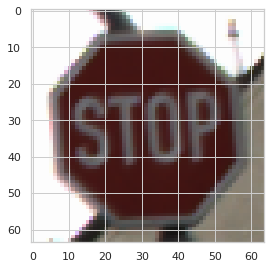

PREDICTION : The Image belongs to class : 14, with description : 4
ACTUAL : The Image belongs to class : 14, with description : 4


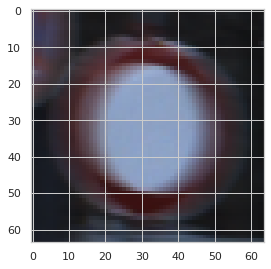

PREDICTION : The Image belongs to class : 15, with description : 9
ACTUAL : The Image belongs to class : 15, with description : 9


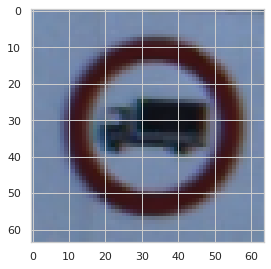

PREDICTION : The Image belongs to class : 16, with description : 21
ACTUAL : The Image belongs to class : 16, with description : 21


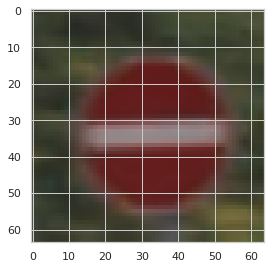

PREDICTION : The Image belongs to class : 17, with description : 20
ACTUAL : The Image belongs to class : 17, with description : 20


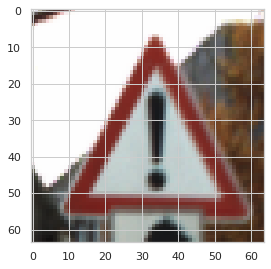

PREDICTION : The Image belongs to class : 18, with description : 27
ACTUAL : The Image belongs to class : 18, with description : 27


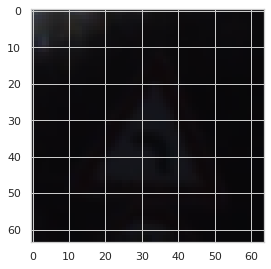

PREDICTION : The Image belongs to class : 19, with description : 38
ACTUAL : The Image belongs to class : 19, with description : 38


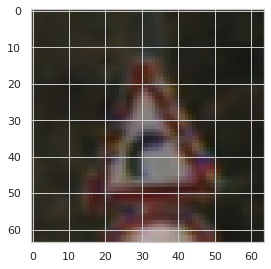

PREDICTION : The Image belongs to class : 20, with description : 4
ACTUAL : The Image belongs to class : 20, with description : 4


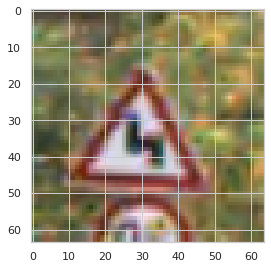

PREDICTION : The Image belongs to class : 21, with description : 33
ACTUAL : The Image belongs to class : 21, with description : 33


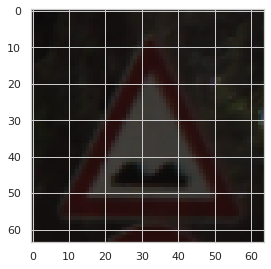

PREDICTION : The Image belongs to class : 22, with description : 9
ACTUAL : The Image belongs to class : 22, with description : 9


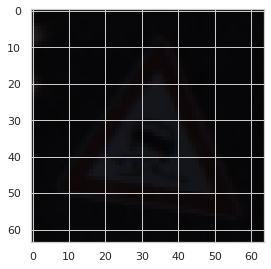

PREDICTION : The Image belongs to class : 23, with description : 3
ACTUAL : The Image belongs to class : 23, with description : 3


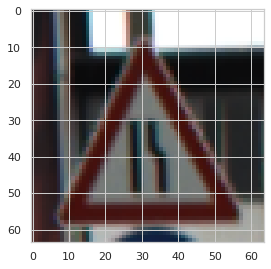

PREDICTION : The Image belongs to class : 24, with description : 1
ACTUAL : The Image belongs to class : 24, with description : 1


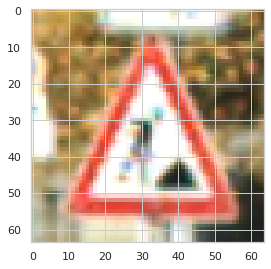

PREDICTION : The Image belongs to class : 25, with description : 11
ACTUAL : The Image belongs to class : 25, with description : 11


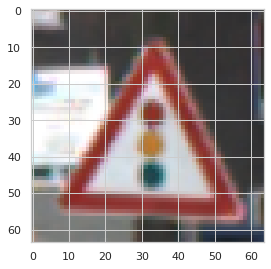

PREDICTION : The Image belongs to class : 26, with description : 13
ACTUAL : The Image belongs to class : 26, with description : 13


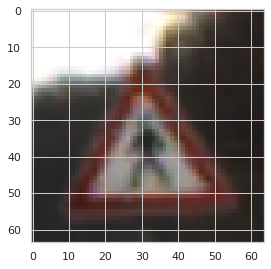

PREDICTION : The Image belongs to class : 27, with description : 10
ACTUAL : The Image belongs to class : 27, with description : 10


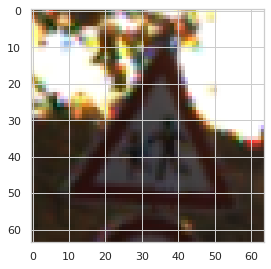

PREDICTION : The Image belongs to class : 28, with description : 9
ACTUAL : The Image belongs to class : 28, with description : 9


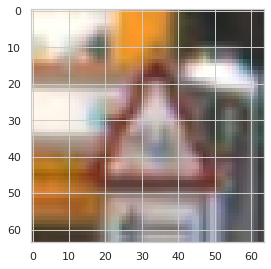

PREDICTION : The Image belongs to class : 29, with description : 11
ACTUAL : The Image belongs to class : 29, with description : 11


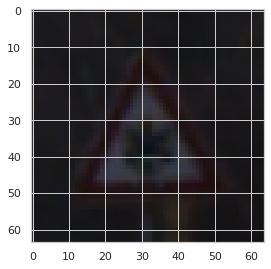

PREDICTION : The Image belongs to class : 30, with description : 5
ACTUAL : The Image belongs to class : 30, with description : 5


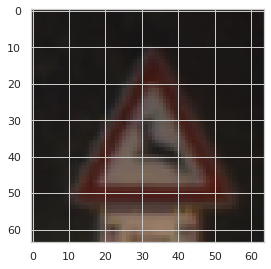

PREDICTION : The Image belongs to class : 31, with description : 17
ACTUAL : The Image belongs to class : 31, with description : 17


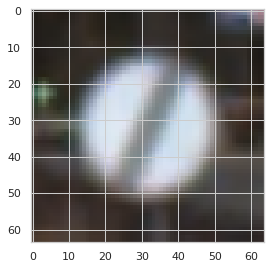

PREDICTION : The Image belongs to class : 32, with description : 34
ACTUAL : The Image belongs to class : 32, with description : 34


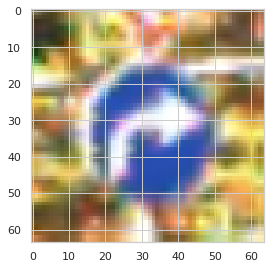

PREDICTION : The Image belongs to class : 33, with description : 23
ACTUAL : The Image belongs to class : 33, with description : 23


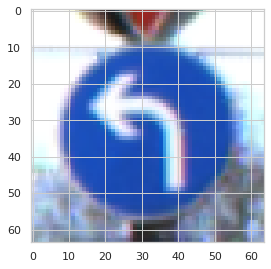

PREDICTION : The Image belongs to class : 34, with description : 2
ACTUAL : The Image belongs to class : 34, with description : 2


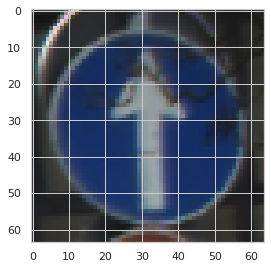

PREDICTION : The Image belongs to class : 35, with description : 17
ACTUAL : The Image belongs to class : 35, with description : 17


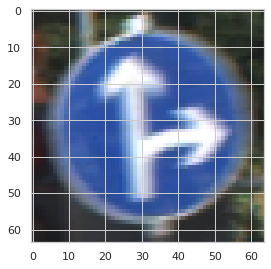

PREDICTION : The Image belongs to class : 36, with description : 3
ACTUAL : The Image belongs to class : 36, with description : 3


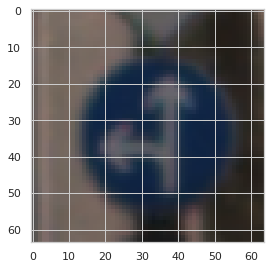

PREDICTION : The Image belongs to class : 37, with description : 12
ACTUAL : The Image belongs to class : 37, with description : 12


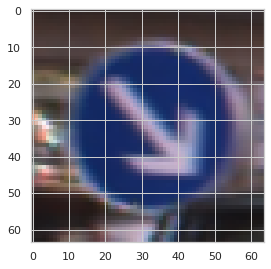

PREDICTION : The Image belongs to class : 38, with description : 16
ACTUAL : The Image belongs to class : 38, with description : 16


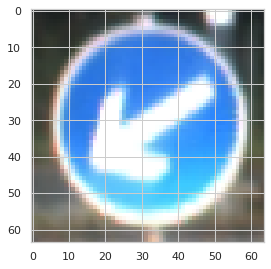

PREDICTION : The Image belongs to class : 39, with description : 8
ACTUAL : The Image belongs to class : 39, with description : 8


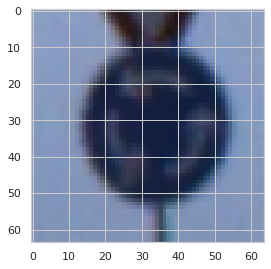

PREDICTION : The Image belongs to class : 33, with description : 23
ACTUAL : The Image belongs to class : 40, with description : 7


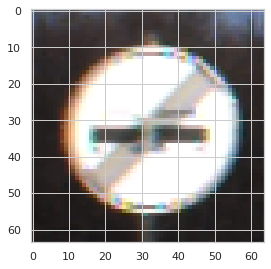

PREDICTION : The Image belongs to class : 41, with description : 30
ACTUAL : The Image belongs to class : 41, with description : 30


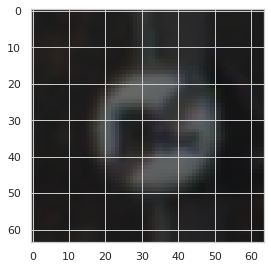

PREDICTION : The Image belongs to class : 42, with description : 18
ACTUAL : The Image belongs to class : 42, with description : 18


In [0]:

for i,img in enumerate(class_wise_test_img):
     show_img = img
     img_arr = np.expand_dims(img,axis=0) # to add new dimension to meet required input dims

     classes = model_regularized.predict(img_arr)

     plt.imshow(img)
     #plt.axis('off')
     plt.show()
     predicted_class = np.argmax(classes)
     print('PREDICTION : The Image belongs to class : {}, with description : {}'.format(predicted_class,ImagesLabelsTest[predicted_class]))
     print('ACTUAL : The Image belongs to class : {}, with description : {}'.format(class_wise_test_labels[i],ImagesLabelsTest[class_wise_test_labels[i]]))